# Actividad Semanal 4

## TC4029 Ciencia y analítica de datos (Gpo 10)

![LogoTec2.jpg](../img/LogoTec2.jpg)

#### Profesores : Jobish Vallikavungal Devassia, Victoria Guerrero Orozco

#### Alumnos:  Armando Bringas Corpus (A01200230), Walter André Hauri Rosales (A01794237)

#### Fecha: 10/10/2022

## Parte 1 

### 0. Preprocesamiento de los Datos

In [1]:
# Importación de librerías

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# Mostrar todas las filas y columnas

#pd.set_option('display.rows', None)
pd.set_option('display.max_columns', None)

#### Datos

Importación de los datos del repositorio

In [3]:
input_data = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

df = pd.read_csv(input_data)
df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,0.0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,-1.0,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,0.0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,-1.0,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [4]:
# Nombre de las columnas

df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

Recodificación de los datos en variables categóricas y numéricas

In [5]:
df['ID'] = df['ID'].astype('category')
df['X1'] = df['X1'].astype('float64')
df['X2'] = df['X2'].astype('category')
df['X3'] = df['X3'].astype('category')
df['X4'] = df['X4'].astype('category')
df['X6'] = df['X6'].astype('category')
df['X7'] = df['X7'].astype('category')
df['X8'] = df['X8'].astype('category')
df['X9'] = df['X9'].astype('category')
df['X10'] = df['X10'].astype('category')
df['X11'] = df['X11'].astype('category')
df['Y'] = df['Y'].astype('category')
df.dtypes

ID     category
X1      float64
X2     category
X3     category
X4     category
X5      float64
X6     category
X7     category
X8     category
X9     category
X10    category
X11    category
X12     float64
X13     float64
X14     float64
X15     float64
X16     float64
X17     float64
X18     float64
X19     float64
X20     float64
X21     float64
X22     float64
X23     float64
Y      category
dtype: object

#### Limpieza de Datos

Remoción de todos los registros que tengan valores NaN (Not a Number)

In [6]:
df.dropna(inplace=True)

In [7]:
# Columnas y filas

df.shape

(29958, 25)

### 1. Determinación del número mínimo de componentes principales que representan la mayor parte de la variación en los datos

#### Normalización de los Datos

Para PCA sólo se consideran las variables numéricas

In [8]:
# Separación de las variables de entrada 'X' y salida 'y'

X = df.drop(['ID','X2','X3','X4','X6','X7','X8','X9','X10','X11','Y'], axis=1)
y = df['Y']

In [9]:
# Nombre de las columnas de X

X.columns

Index(['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23'],
      dtype='object')

In [10]:
X.head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000.0,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [11]:
# Normalización de los datos
scaled_data = preprocessing.scale(X)
scaled_data

array([[-1.13736269, -1.24628151, -0.64249667, ..., -0.30810735,
        -0.31412418, -0.29348473],
       [-0.36656147, -1.0292244 , -0.65920548, ..., -0.24431534,
        -0.31412418, -0.18105373],
       [-0.59780183, -0.16099598, -0.29873773, ..., -0.24431534,
        -0.24870184, -0.01240721],
       ...,
       [-1.06028257,  0.16458968, -0.6472202 , ..., -0.0401809 ,
        -0.18327949, -0.11921667],
       [-0.67488196,  0.5987039 , -0.71793741, ..., -0.18524394,
         3.15090487, -0.19207196],
       [-0.90612232,  1.14134666, -0.04505161, ..., -0.24431534,
        -0.24870184, -0.23726923]])

#### Creación de modelo de PCA

In [12]:
# Creación de modelo de PCA

pca = PCA(n_components=14)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

array([[-1.95861347e+00, -5.36935548e-01,  1.33026326e+00, ...,
        -3.14858410e-03,  8.15558569e-03,  9.86538923e-03],
       [-1.73543639e+00, -2.17455383e-01,  8.63894947e-01, ...,
         1.22574823e-02, -4.04768371e-03,  7.41830384e-04],
       [-1.22457257e+00, -2.85108665e-01,  2.13127766e-01, ...,
        -8.04550604e-02, -4.13466939e-02, -5.71189238e-02],
       ...,
       [-1.28525164e+00,  1.46260790e-01,  2.50362188e-01, ...,
         3.47276425e-02,  1.28749411e-02, -1.21264837e-02],
       [ 8.30126576e-01,  2.41954325e+00,  3.63918332e-01, ...,
         1.70414940e-01, -1.39937218e-01, -8.16447343e-03],
       [-5.17390297e-01, -6.00838232e-01, -7.49601106e-01, ...,
        -1.76099500e-02,  1.15296003e-01, -4.70445624e-02]])

#### Determinación de los componentes iniciales

Porcentaje de varianza por componente 
<a id='var_comp'></a>

In [13]:
# Por porcentaje de varianza por componente del modelo de PCA

per_var = np.round(pca.explained_variance_ratio_*100, decimals=4)
labels=['PC' + str(x) for x in range(1, len(per_var)+1)]

print("\n".join("{} : % {}".format(x, y) for x, y in zip(labels, per_var)))

PC1 : % 42.2779
PC2 : % 12.2552
PC3 : % 7.4643
PC4 : % 6.6084
PC5 : % 6.3124
PC6 : % 6.2341
PC7 : % 5.5688
PC8 : % 5.1902
PC9 : % 5.0523
PC10 : % 1.8889
PC11 : % 0.5072
PC12 : % 0.2933
PC13 : % 0.181
PC14 : % 0.166


#### Sumario de PCA

In [14]:
summary_pca_df = pd.DataFrame({'Standard_Deviation': np.sqrt(pca.explained_variance_),
                               'Proportion_of_Variance': pca.explained_variance_ratio_,
                               'Cumulative proportion' : np.cumsum(pca.explained_variance_ratio_)
                              })
summary_pca_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Standard_Deviation,2.432921,1.309882,1.022269,0.961876,0.940087,0.934241,0.882984,0.852438,0.841041,0.514249,0.266470,0.202644,0.15918,0.152463
Proportion_of_Variance,0.422779,0.122552,0.074643,0.066084,0.063124,0.062341,0.055688,0.051902,0.050523,0.018889,0.005072,0.002933,0.00181,0.001660
Cumulative proportion,0.422779,0.545331,0.619974,0.686058,0.749182,0.811523,0.867211,0.919113,0.969636,0.988525,0.993597,0.996530,0.99834,1.000000


Podemos observar que los componentes del PC1 al PC7 son los que más contribuyen con un 91.91 % de la varianza total asociada con las variables originales.

#### Scree Plot

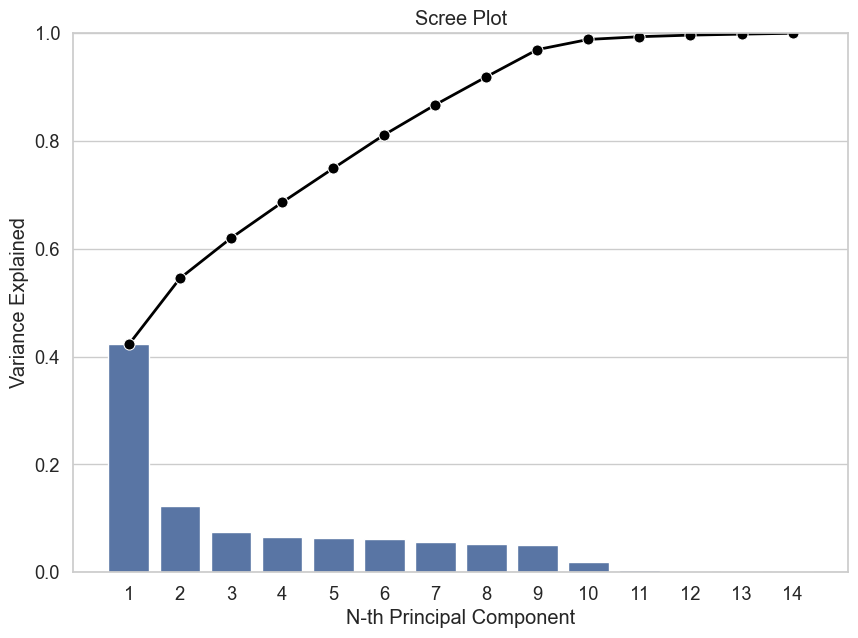

In [15]:
PC_components = np.arange(pca.n_components_) + 1
_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pca.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Vamos a considerar los componentes de PC1 a PC7 para la interpretación de cada componente principal en términos de los variables originales ya que contribuyen un 91.91 % de la varianza total asociada con las variables originales.

### 2. Interpretación de cada componente principal en términos de las variables originales

Dataframe para examinar la magnitud y dirección de los coeficientes de las variables originales

In [16]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), 
                                 columns = labels,
                                 index = X.columns
                                )

pca_components_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.165507,0.300709,-0.378575,-0.200103,0.035312,-0.078883,0.111239,-0.046381,-0.821996,-0.029201,-0.006198,0.015697,-0.000417,0.003345
X5,0.032789,0.071906,-0.869471,0.338990,-0.039760,0.071461,-0.078816,0.027368,0.330346,-0.009011,0.000139,-0.001377,0.000132,0.001067
X12,0.372446,-0.190793,-0.034207,-0.063899,0.041391,-0.043987,0.008169,0.009341,0.010348,0.566716,0.416018,-0.432992,-0.183793,-0.316576
X13,0.383253,-0.174644,-0.001814,0.007629,0.083164,-0.028824,-0.032444,-0.135636,0.016872,0.386872,0.038425,0.345052,0.329467,0.645227
X14,0.388264,-0.126883,0.034747,0.060528,0.113790,0.099239,-0.121162,0.093077,-0.018607,0.122863,-0.484776,0.495792,-0.086466,-0.527640
X15,0.391557,-0.120403,0.034073,0.074774,0.028378,0.014527,0.126494,0.039157,0.019109,-0.205260,-0.523211,-0.489647,-0.362078,0.346095
X16,0.388505,-0.105928,0.033882,0.039553,-0.106756,-0.099290,-0.007584,0.049781,0.023701,-0.419992,0.068372,-0.249500,0.718388,-0.226667
X17,0.380672,-0.094157,0.018489,-0.070616,-0.164986,0.069272,0.007892,-0.000282,0.058701,-0.488861,0.513313,0.338689,-0.427734,0.072287
X18,0.135120,0.383194,0.173845,0.362055,0.225652,0.040574,-0.201646,-0.748694,0.019949,-0.056581,0.047513,-0.069359,-0.044841,-0.084567
X19,0.116768,0.408391,0.200925,0.345745,0.148714,0.408361,-0.278835,0.578491,-0.110712,0.050854,0.147307,-0.068851,0.038925,0.124894


En la siguiente función obtenemos las columnas de máxima varianza para los componentes de PC1 a PC7.

In [17]:
# Principal variable por componente

for i in range(1,8):
    largest_var = pca_components_df['PC' + str(i)].idxmax()
    print(f'Para componente PC{i} la columna de mayor varianza es la {largest_var}')

Para componente PC1 la columna de mayor varianza es la X15
Para componente PC2 la columna de mayor varianza es la X19
Para componente PC3 la columna de mayor varianza es la X19
Para componente PC4 la columna de mayor varianza es la X18
Para componente PC5 la columna de mayor varianza es la X23
Para componente PC6 la columna de mayor varianza es la X22
Para componente PC7 la columna de mayor varianza es la X20


In [18]:
for i in range(1,8):
    largest_var = pca_components_df['PC' + str(i)].nlargest(7)
    print(f'Para componente PC{i} las columnas de mayor varianza son \n{largest_var}')

Para componente PC1 las columnas de mayor varianza son 
X15    0.391557
X16    0.388505
X14    0.388264
X13    0.383253
X17    0.380672
X12    0.372446
X1     0.165507
Name: PC1, dtype: float64
Para componente PC2 las columnas de mayor varianza son 
X19    0.408391
X20    0.392339
X18    0.383194
X21    0.349613
X23    0.323529
X22    0.303923
X1     0.300709
Name: PC2, dtype: float64
Para componente PC3 las columnas de mayor varianza son 
X19    0.200925
X18    0.173845
X20    0.122065
X21    0.062272
X14    0.034747
X15    0.034073
X16    0.033882
Name: PC3, dtype: float64
Para componente PC4 las columnas de mayor varianza son 
X18    0.362055
X19    0.345745
X5     0.338990
X20    0.244688
X15    0.074774
X14    0.060528
X16    0.039553
Name: PC4, dtype: float64
Para componente PC5 las columnas de mayor varianza son 
X23    0.659155
X18    0.225652
X19    0.148714
X14    0.113790
X13    0.083164
X12    0.041391
X1     0.035312
Name: PC5, dtype: float64
Para componente PC6 las column

In [19]:
# Columnas que menos aportan por componente

for i in range(1,8):
    largest_var = pca_components_df['PC' + str(i)].idxmin()
    print(f'Para componente PC{i} la columna de menor varianza es la {largest_var}')

Para componente PC1 la columna de menor varianza es la X5
Para componente PC2 la columna de menor varianza es la X12
Para componente PC3 la columna de menor varianza es la X5
Para componente PC4 la columna de menor varianza es la X22
Para componente PC5 la columna de menor varianza es la X21
Para componente PC6 la columna de menor varianza es la X21
Para componente PC7 la columna de menor varianza es la X21


#### Scatter Plot

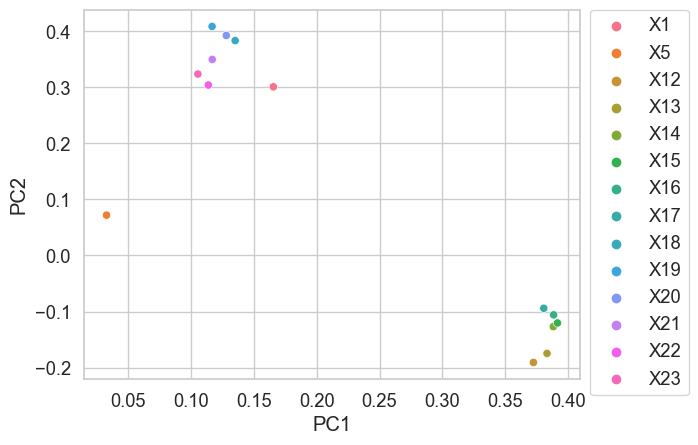

In [20]:
sns.scatterplot(data=pca_components_df, 
                x="PC1", y="PC2", 
                hue=pca_components_df.index)

plt.legend(bbox_to_anchor=(1.02, 1), 
                loc='upper left', 
                borderaxespad=0)


### 3. Identificación de Valores Atípicos

A continuación se muestra una gráfica de Box Plot para identificar los valores atípicos

[Text(0.5, 0, 'Variables'), Text(0, 0.5, 'Valores')]

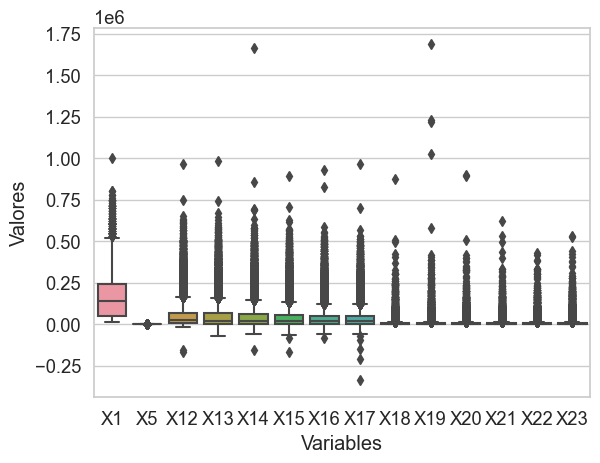

In [21]:
ax = sns.boxplot(data=X)
ax.set(xlabel='Variables', ylabel='Valores')

Visualización de Box Plot por variable

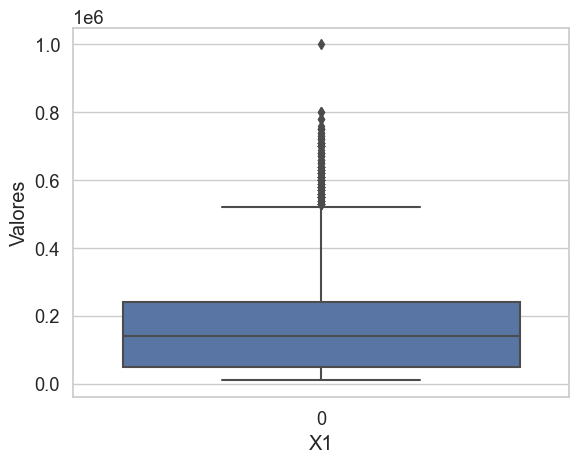

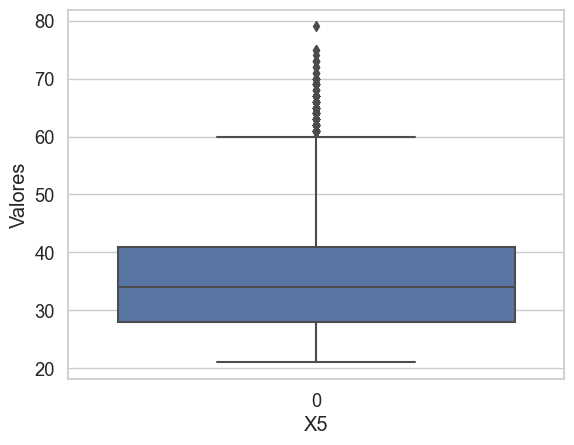

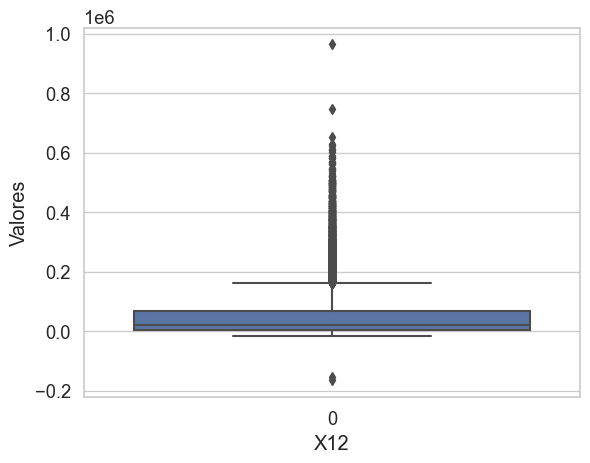

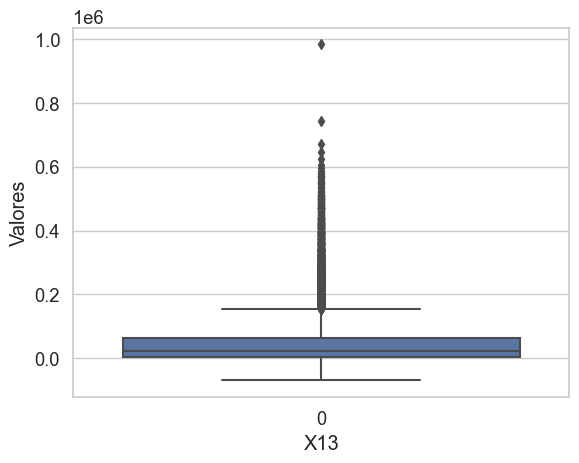

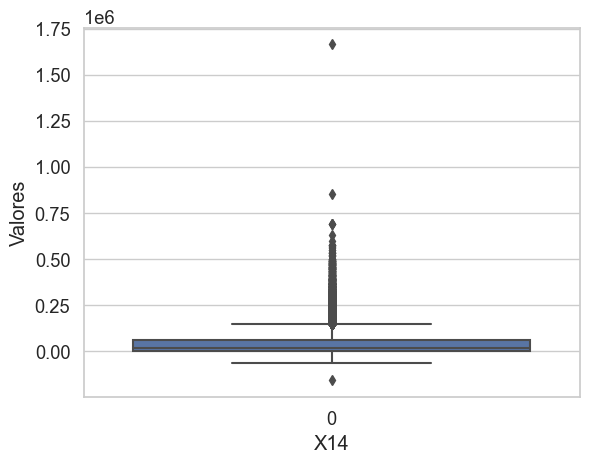

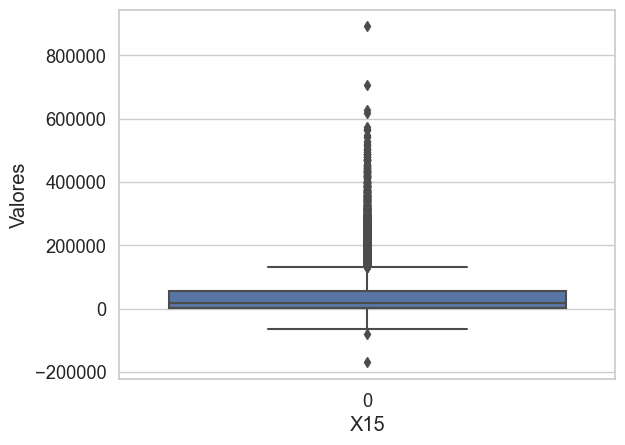

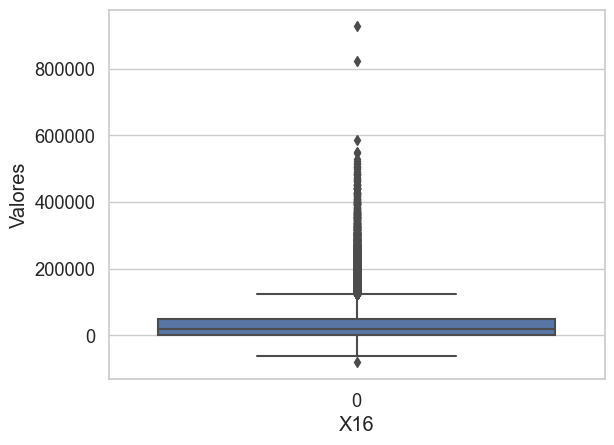

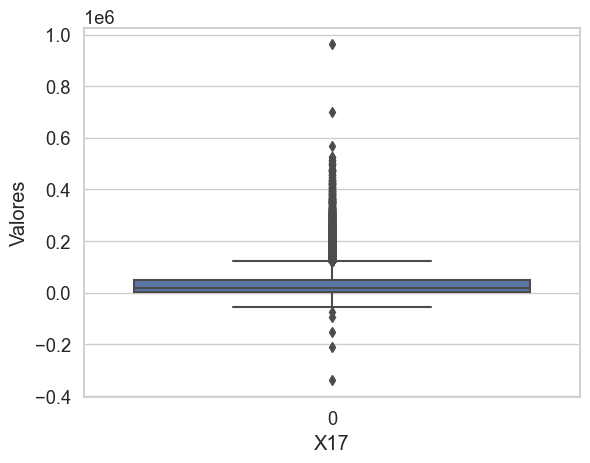

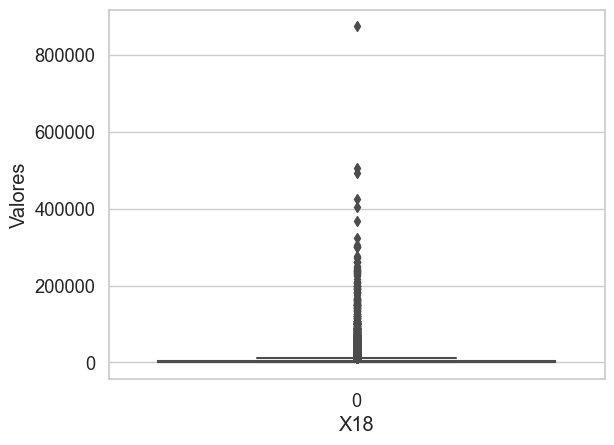

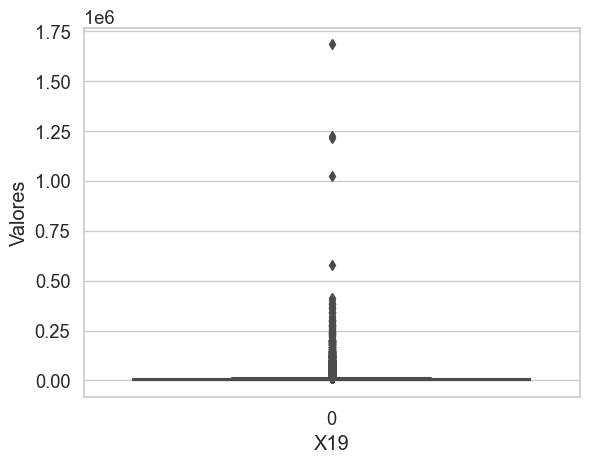

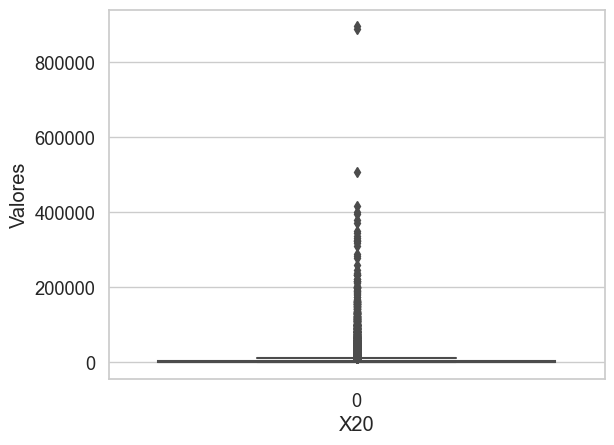

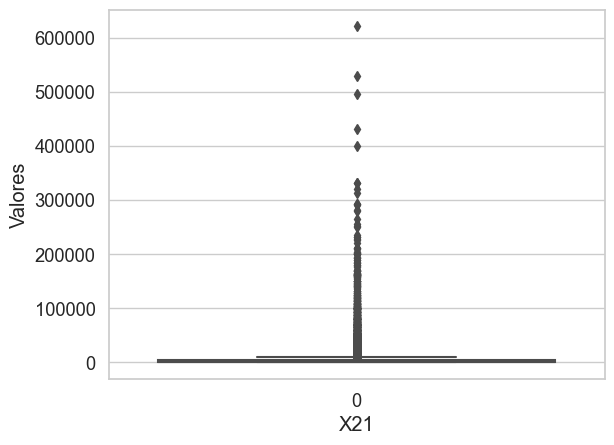

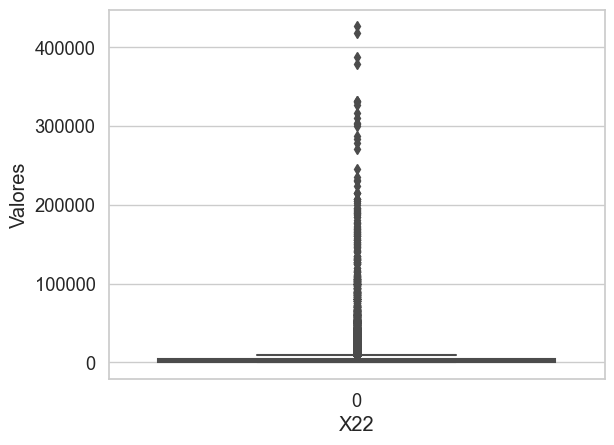

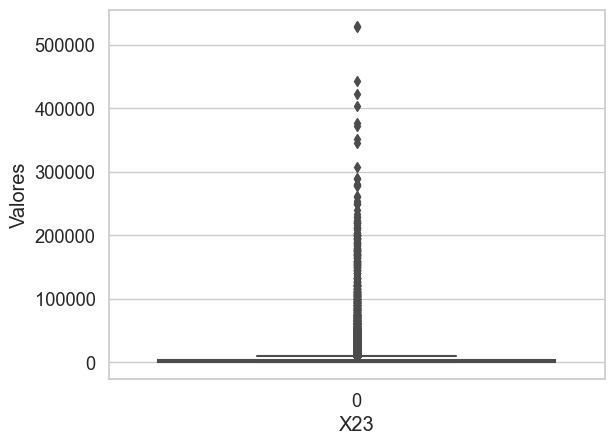

In [22]:
for i in range(len(X.columns)):
    ax = sns.boxplot(data=X.iloc[:,i])
    ax.set(xlabel=X.columns[i], ylabel='Valores')
    plt.show()

Como podemos ver todas las variables presentan valores atípicos (outliers)

## Parte 2

### 1. ¿Cuál es el número de componentes mínimo y por qué?

Para cumplir el criterio de cubrir al menos el 90% de la varianza de los datos originales, es necesario utilizar los primeros 7 componentes (de PC1 a PC7) ya que estos contribuyen con un 91.91 % de la varianza total asociada con las variables originales.

### 2. ¿Cuál es la variación de los datos que representan esos componentes?

Componente  | Varianza
----------- | --------
PC1         | % 42.2779
PC2         | % 12.2552
PC3         | % 7.4643
PC4         | % 6.6084
PC5         | % 6.3124
PC6         | % 6.2341
PC7         | % 5.5688
PC8         | % 5.1902
PC9         | % 5.0523
PC10        | % 1.8889
PC11        | % 0.5072
PC12        | % 0.2933
PC13        | % 0.181
PC14        | % 0.166

[Referencia al código](#var_comp)

### 3. ¿Cuál es la pérdida de información después de realizar PCA?

Al principio del análisis si sólo hubiérmos tomado los dos primeros componentes nuestra pérdida de información hubiera sido de un 45.47% (100 % - (PC1% + PC2%)). Por lo tanto consideramos el criterio de al menos cubrir el 90% de la varianza, por lo que al final tomamos los siete primeros componentes que contribyen con el 91.91%, por lo que la pérdida sería de un 8.09%.

### 4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?

* Las de mayor importancia son principalmente X15, X18, X19, X20, X22 y X23 que hacen referencia a la cantidad de pagos anteriores.

* Las de menor importancia son principalmente X5, X12 que hace referencia a la edad y la cantidad de saldo a deber en el mes de septiembre.
  

### 5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?

Se recomienda hacer un PCA cuando se tiene muchas variables y se requiere reducir la dimensionalidad del modelo. Con respecto a los beneficios que ofrece para Machine Learning, el PCA permite disminuir las variables redundates o que aportan la misma información.